<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/notebooks/ETL_Vinhos_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Site: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

As informações referentes à quantidade de uvas processadas, produção e comercialização de vinhos, suco e derivados provenientes do Estado do Rio Grande do Sul, que representa mais de 90% da produção nacional. Apresentamos também os dados de importações e exportações dos produtos da vitivinicultura.

Alguns esclarecimentos se fazem necessários, para que os usuários façam o uso correto das informações:

Os vinhos nacionais são classificados para fins estatísticos em vinho de mesa (elaborados com uvas americanas e/ou híbridas), vinho fino de mesa (elaborados com uvas Vitis Vinifera L.) e vinho especial (corte de vinho de mesa e fino de mesa).
Os vinhos importados, denominados de vinhos de mesa são equivalentes aos vinhos finos de mesa nacionais, pois são elaborados com uvas Vitis Vinifera L.
Os dados constantes da base de dados ALICEweb, referentes à vinhos e espumantes são expressos em quilos, no entanto considerando que a densidade desses produtos é de aproximadamente um (1), consideramos 1 Kg = 1L.

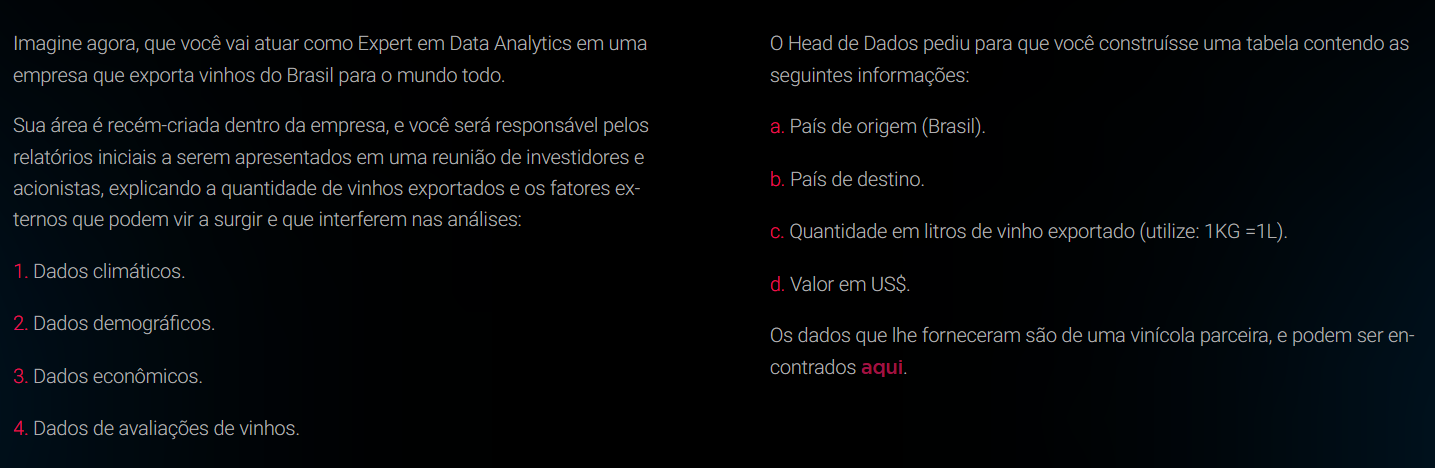

In [34]:
# adicionar aqui as importações
import pandas as pd

A ideia inicial é entender os dados de exportação para criar a seguinte tabela:

pais_origem | pais_destino | qtd_litros_vinho_exportado | valor_us
---------- | ---------- | ------------------------| --------
Brasil | Alemanha | 10 | 100.89 |


In [35]:
exp_espumantes = pd.read_csv("https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/raw/ExpEspumantes.csv", sep=";", index_col="Id")
exp_espumantes.head()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
Id,,,,,,,,,,,,,,,,,,,,,
1,Alemanha,0,0,0,0,0,0,0,0,0,...,4092,21373,1003,5466,2388,14767,142,265,1164,6560
2,Angola,0,0,0,0,0,0,0,0,0,...,63,280,1007,3615,24,38,0,0,26383,141588
3,Antigua e Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,7,34,32,328,10,82,65,146
4,Antilhas Holandesas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Argentina,0,0,0,0,0,0,0,0,0,...,4342,17243,0,0,315,894,0,0,0,0


In [36]:
exp_espumantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1 to 101
Columns: 107 entries, País to 2022.1
dtypes: int64(106), object(1)
memory usage: 85.2+ KB


In [37]:
exp_espumantes.isnull().sum().sum()

0

In [38]:
exp_vinhos = pd.read_csv("https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/raw/ExpVinho.csv", sep=";", index_col="Id")
exp_vinhos.head()

,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
Id,,,,,,,,,,,,,,,,,,,,,
1,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
2,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
4,Angola,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
5,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
exp_vinhos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1 to 128
Columns: 107 entries, País to 2022.1
dtypes: int64(106), object(1)
memory usage: 108.0+ KB




---
Função para montar o df de forma dinamica

In [40]:
def monta_df(column1, column2, dataframe, tipo_vinho, tipo):
  df = dataframe[['País', column1, column2]].sort_values(column2,ascending=False)
  df['Ano'] = df.columns[1]
  df['Origem'] = 'Brasil'
  df['Tipo Vinho'] = tipo_vinho
  df['Tipo'] = tipo
  df = df.rename({df.columns[0]: 'Destino',df.columns[1]: 'Quantidade (L)', df.columns[2]: 'Valor U$'}, axis=1)
  return df

In [41]:
anos = list(range(1970, 2023))

In [42]:
vinhos = pd.DataFrame()

## Montando a tabela com os espumantes de 1970 até 2023
for ano in anos:
  df = monta_df(str(ano), f'{str(ano)}.1', exp_espumantes, 'Espumantes', 'Exportação')
  vinhos = pd.concat([vinhos,df], axis=0)

In [43]:
## Montando a tabela com os vinhos e juntando com os espumantes
for ano in anos:
  df = monta_df(str(ano), f'{str(ano)}.1', exp_vinhos, 'Vinho De Mesa', 'Exportação')
  vinhos = pd.concat([vinhos,df], axis=0)

In [44]:
vinhos.shape

(12137, 7)

In [45]:
dados_final = vinhos.reset_index(drop=True)

In [46]:
dados_final.to_csv('dados_de_vinhos.csv')

In [51]:
dados_final[['Tipo Vinho']].drop_duplicates(subset=['Tipo Vinho'])

,Tipo Vinho
0,Espumantes
5353,Vinho De Mesa


In [52]:
dados_final.value_counts('Tipo Vinho')

Tipo Vinho
Vinho De Mesa    6784
Espumantes       5353
dtype: int64